In [184]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Reading whale returns

whale_path = Path("./Resources/whale_returns.csv")

whale_data = pd.read_csv(whale_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)



In [185]:

# Count nulls
whale_data.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [186]:

# Drop nulls
whale_data = whale_data.dropna()
whale_data.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [228]:
whale_data = whale_data.sort_index()
whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [187]:
# Reading algorithmic returns


algo_path = Path("./Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)



In [188]:
# Count nulls
algo_data.isnull().sum()



Algo 1    0
Algo 2    6
dtype: int64

In [189]:
# Drop nulls
algo_data = algo_data.dropna()
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [271]:
algo_data = algo_data.sort_index()
algo_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [190]:

# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path("./Resources/sp_tsx_history.csv")
sp_tsx_data = pd.read_csv(sp_tsx_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)

# Check Data Types
sp_tsx_data.dtypes

Close    object
dtype: object

In [191]:
# Fix Data Types

sp_tsx_data["Close"] = sp_tsx_data["Close"].str.replace("$", "")
sp_tsx_data["Close"] = sp_tsx_data["Close"].str.replace(",", "")


sp_tsx_data["Close"] = sp_tsx_data["Close"].astype("float")
sp_tsx_data["Close"].dtypes



C:\Users\xuxuz\AppData\Local\Temp\ipykernel_12032\2390640093.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_data["Close"] = sp_tsx_data["Close"].str.replace("$", "")


dtype('float64')

In [192]:


# Calculate Daily Returns
sp_tsx_daily_return = sp_tsx_data.pct_change()

sp_tsx_daily_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [193]:
# Drop nulls

sp_tsx_daily_return_clean = sp_tsx_daily_return.dropna()
sp_tsx_daily_return_clean.isnull().sum()




Close    0
dtype: int64

In [194]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_daily_return_clean = sp_tsx_daily_return_clean.rename(columns = {'Close':'sp_tsx_daily_return'})

sp_tsx_daily_return_clean.head()

,sp_tsx_daily_return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [229]:
sp_tsx_daily_return_clean = sp_tsx_daily_return_clean.sort_index()
sp_tsx_daily_return_clean

,sp_tsx_daily_return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [ ]:
sp_tsx_daily_return_clean = sp_tsx_daily_return_clean.sort_index()
sp_tsx_daily_return_clean

In [242]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined = pd.concat([whale_data,algo_data,sp_tsx_daily_return_clean],axis='columns',join = 'inner')

combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


<AxesSubplot:title={'center':'Daily Return of All Portfolios'}, xlabel='Date'>

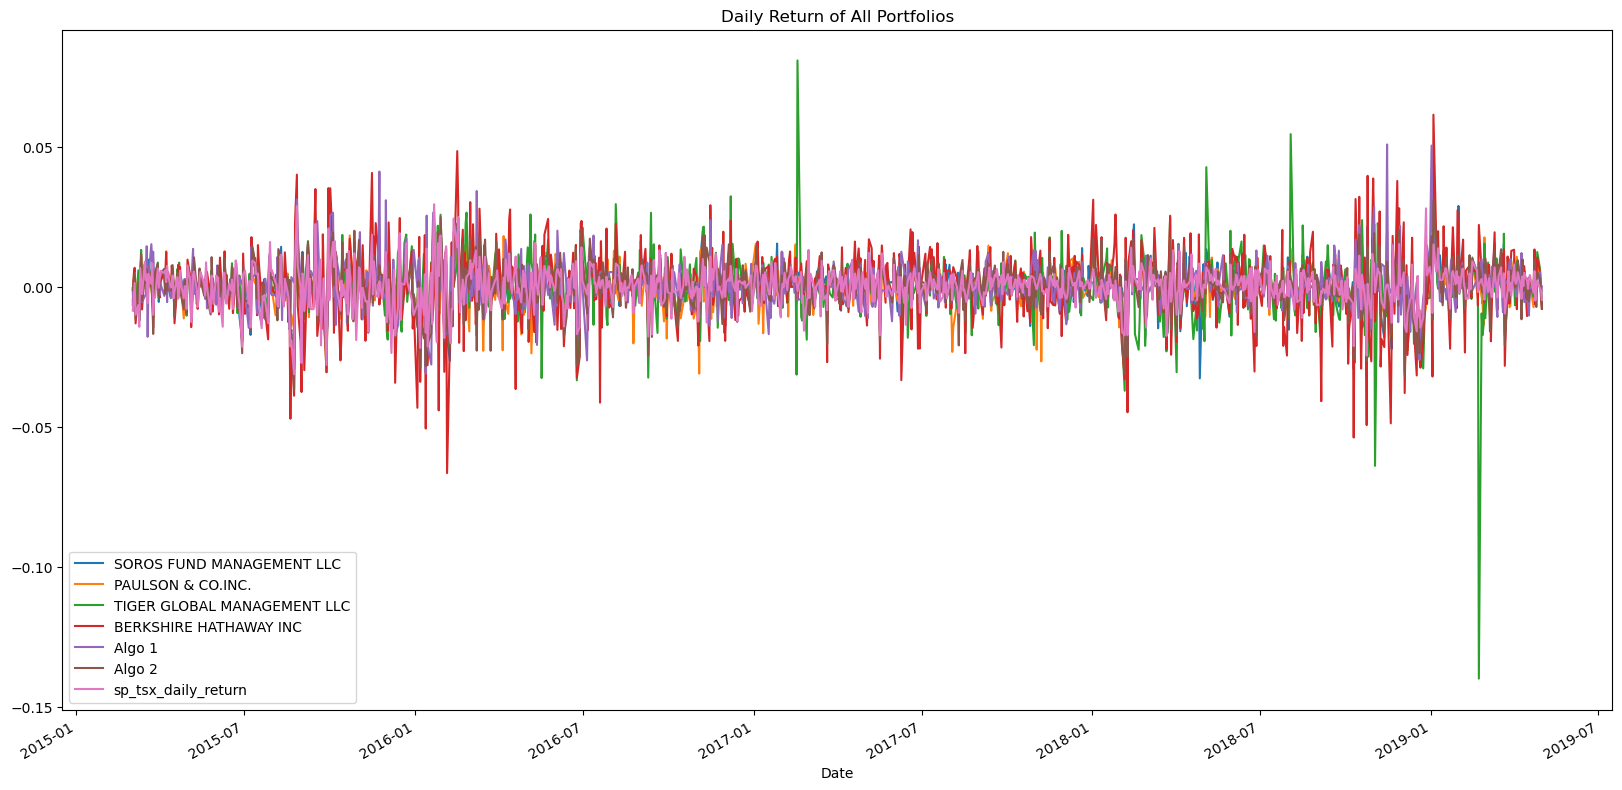

In [196]:
# Plot daily returns of all portfolios

combined.plot(figsize=(20,10),title='Daily Return of All Portfolios')


<AxesSubplot:xlabel='Date'>

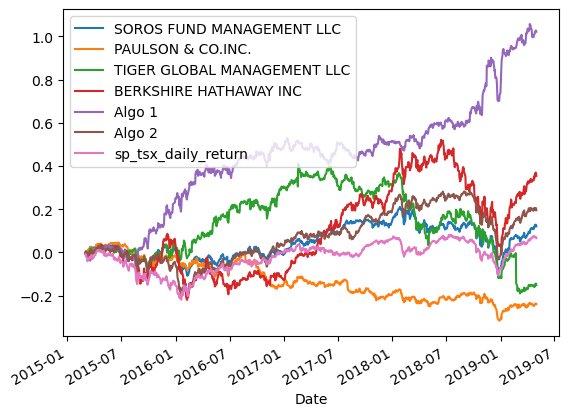

In [197]:
# Calculate cumulative returns of all portfolios

cumulative_return = (1 + combined).cumprod()-1

# Plot cumulative returns

cumulative_return.plot()

In [198]:
# Box plot to visually show risk



<AxesSubplot:>

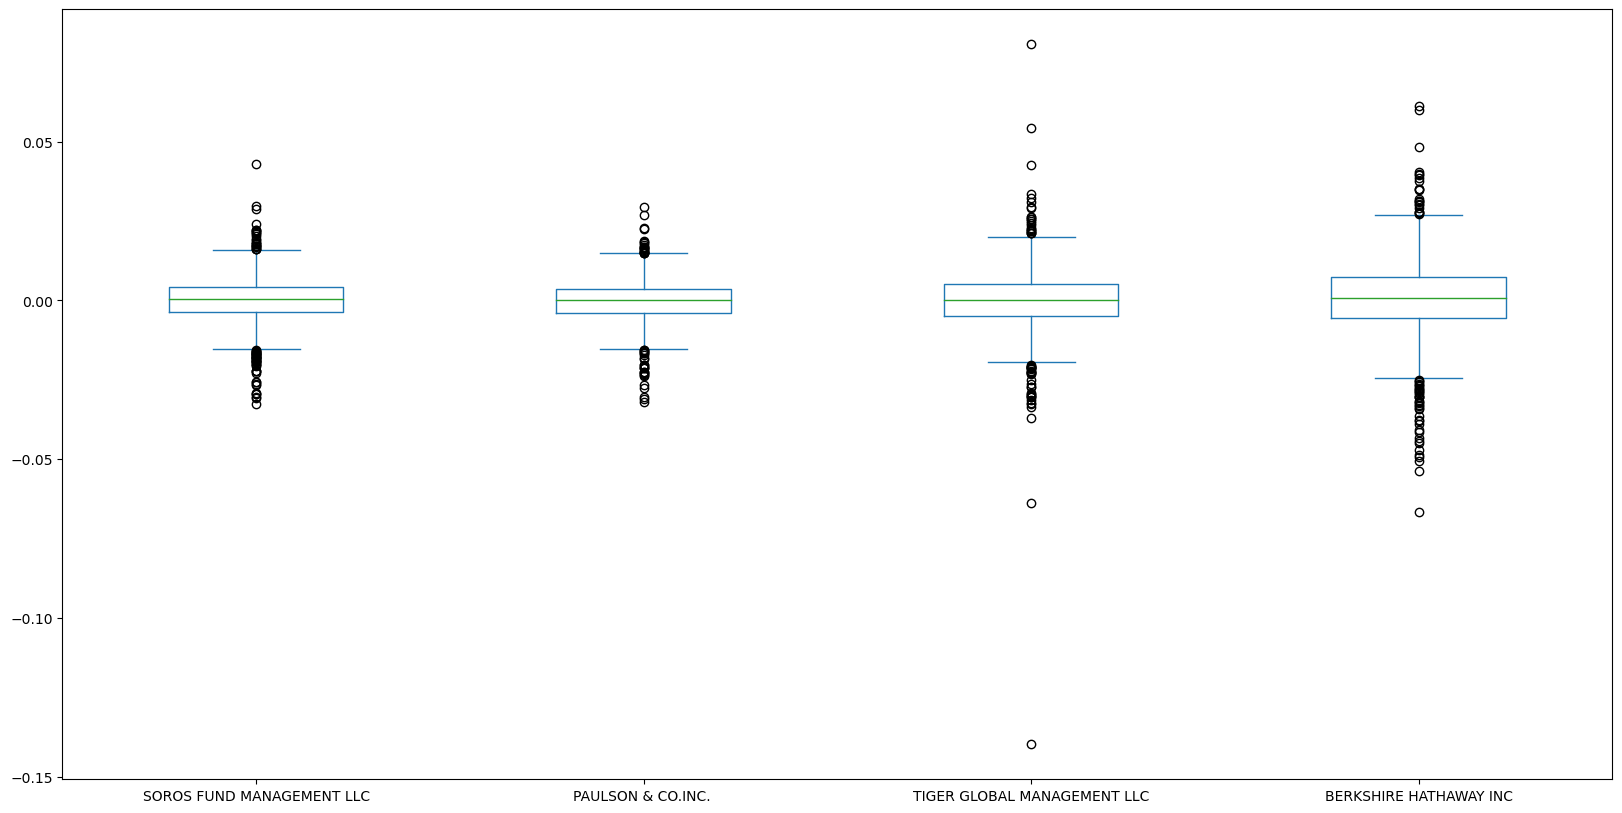

In [199]:
whale_data.plot.box(figsize=(20,10))

<AxesSubplot:>

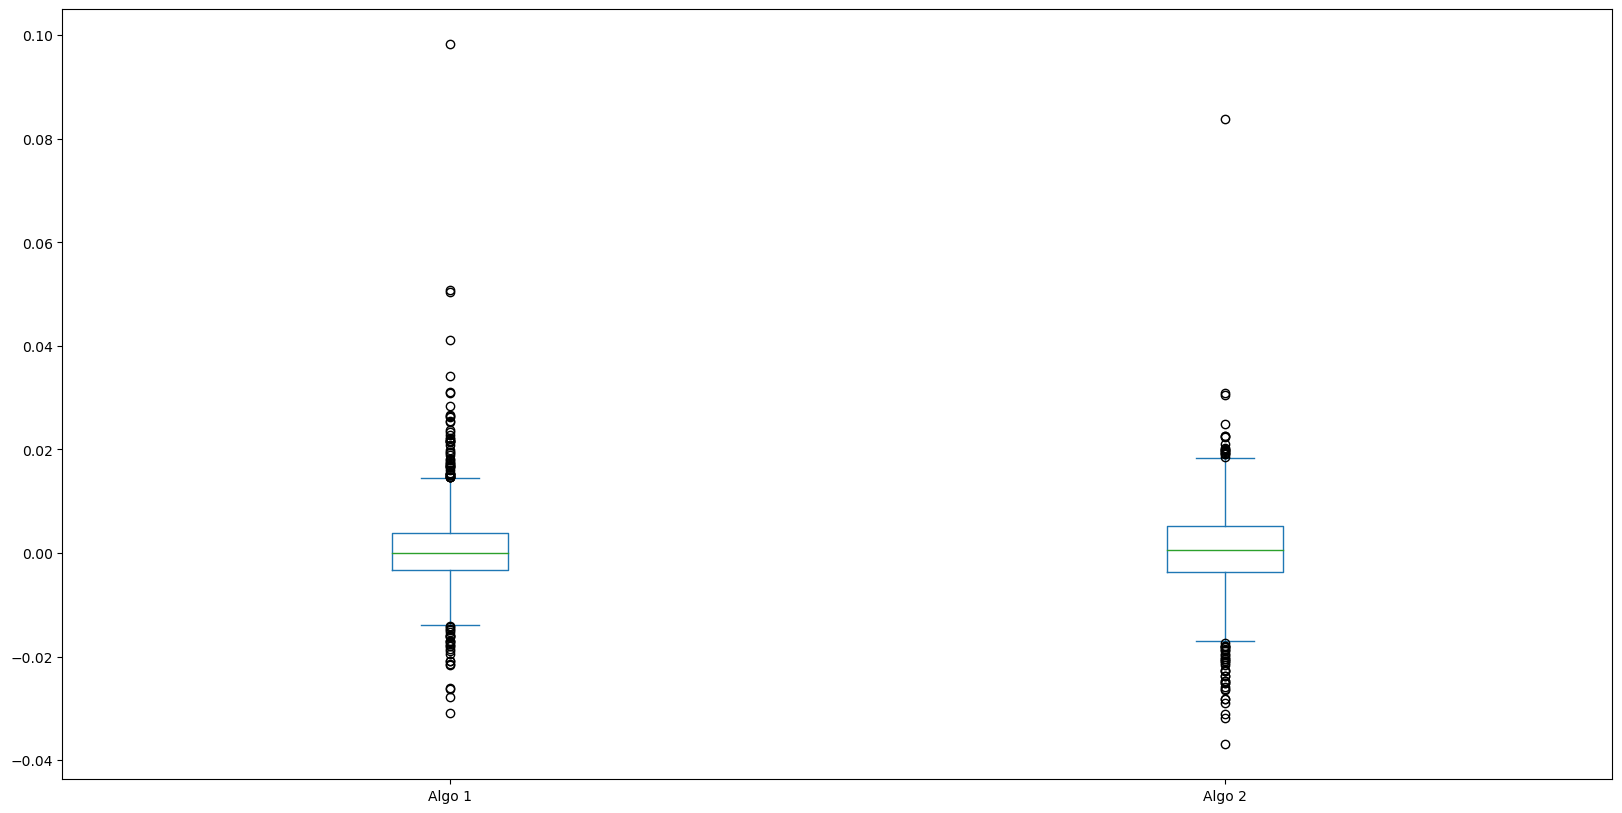

In [200]:
algo_data.plot.box(figsize=(20,10))

In [201]:
# Calculate the daily standard deviations of all portfolios

whale_std = whale_data.std()
whale_std


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [202]:
algo_std = algo_data.std()
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [203]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = sp_tsx_daily_return_clean.std()
sp_tsx_std



sp_tsx_daily_return    0.006637
dtype: float64

In [204]:
# Determine which portfolios are riskier than the S&P TSX 60


        


# Determine which portfolios are riskier than the S&P TSX 60





In [205]:
# Calculate the annualized standard deviation (252 trading days)
whale_annual_std = np.sqrt(252)*whale_std
algo_annual_std = np.sqrt(252)*algo_std
sp_tsx_annual_std = np.sqrt(252)*sp_tsx_std

sp_tsx_annual_std

sp_tsx_daily_return    0.105365
dtype: float64

In [206]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

whale_rolling = whale_data.rolling(window=21).std()
algo_rolling = algo_data.rolling(window=21).std()

<AxesSubplot:xlabel='Date'>

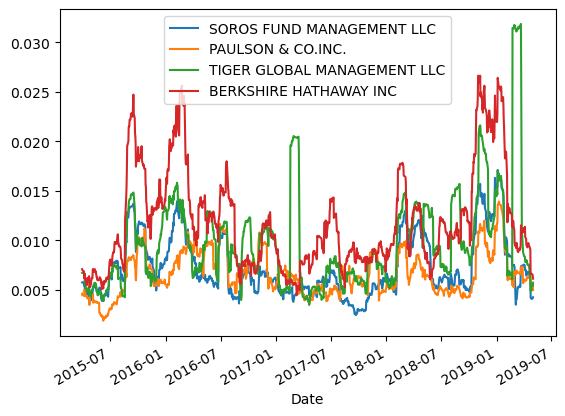

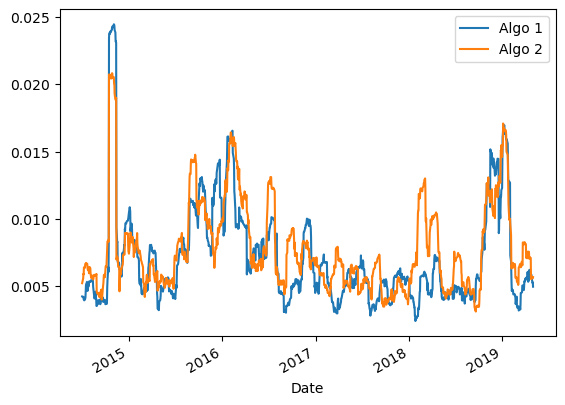

In [207]:
# Plot the rolling standard deviation
whale_rolling.plot()
algo_rolling.plot()

In [270]:
whale_rolling.head(22)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN
2015-03-11,NaN,NaN,NaN,NaN
2015-03-12,NaN,NaN,NaN,NaN
2015-03-13,NaN,NaN,NaN,NaN


In [209]:
# Calculate the correlation
correlation = combined.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_daily_return
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
sp_tsx_daily_return,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

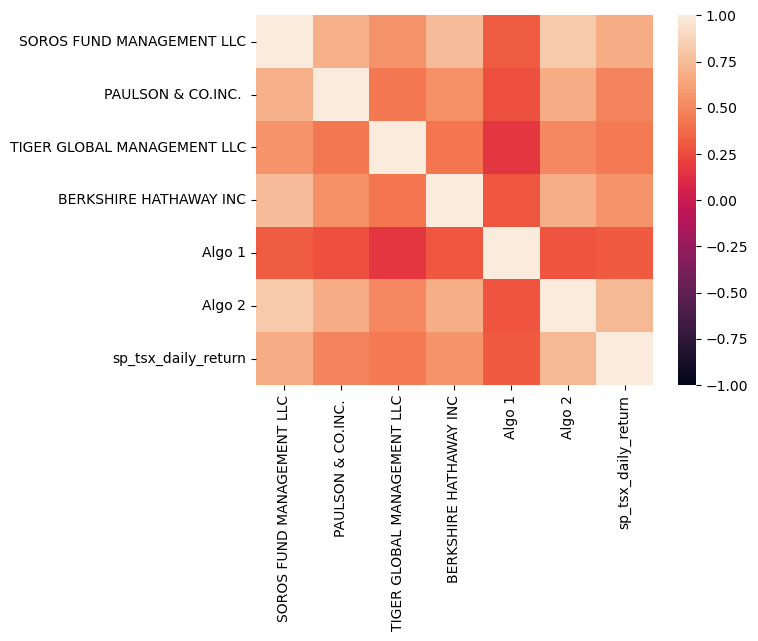

In [210]:
# Display the correlation matrix
sns.heatmap(correlation,vmin=-1, vmax=1)

In [211]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P TSX 60.

compare_table = combined.loc[:,['SOROS FUND MANAGEMENT LLC','sp_tsx_daily_return']]
compare_table

,SOROS FUND MANAGEMENT LLC,sp_tsx_daily_return
Date,,
2015-03-03,-0.001266,-0.008530
2015-03-04,0.002230,-0.003371
2015-03-05,0.004016,0.001344
2015-03-06,-0.007905,-0.009972
2015-03-09,0.000582,-0.006555
...,...,...
2019-04-25,-0.000285,-0.000628
2019-04-26,0.008149,0.002254
2019-04-29,0.001254,-0.000788


<AxesSubplot:xlabel='Date'>

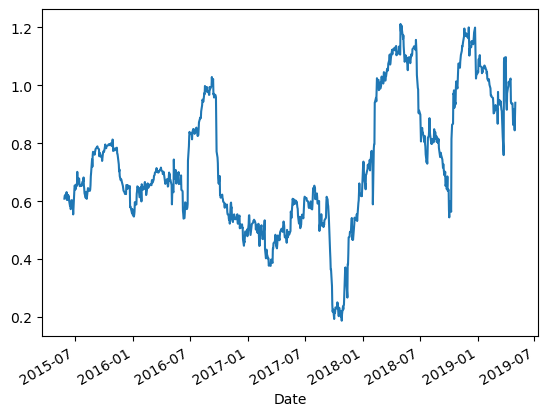

In [212]:
sp_rolling_60days_var = compare_table['sp_tsx_daily_return'].rolling(window=60).var()

soros_rolling_60days_cov = compare_table['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(compare_table['sp_tsx_daily_return'])

beta_rolling_60days = soros_rolling_60days_cov/sp_rolling_60days_var

beta_rolling_60days.plot()



In [213]:
# Use `ewm` to calculate the rolling window

In [214]:

whale_std.ewm(halflife=21).mean()


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.007402
TIGER GLOBAL MANAGEMENT LLC    0.008581
BERKSHIRE HATHAWAY INC         0.009696
dtype: float64

In [215]:
algo_std.ewm(halflife=21).mean()

Algo 1    0.007988
Algo 2    0.008231
dtype: float64

In [216]:
sp_tsx_std.ewm(halflife=21).mean()


sp_tsx_daily_return    0.006637
dtype: float64

In [217]:
# Calculate Sharpe Ratio

whale_annual_sharpe = whale_data.mean()*252/whale_annual_std
algo_annual_sharpe = algo_data.mean()*252/algo_annual_std
sp_tsx_annual_sharpe = sp_tsx_daily_return_clean.mean()*252/sp_tsx_annual_std

whale_annual_sharpe

algo_annual_sharpe

sp_tsx_annual_sharpe

sharpe_combined = pd.concat([whale_annual_sharpe,algo_annual_sharpe,sp_tsx_annual_sharpe],axis='index', join='inner')
sharpe_combined

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.300176
Algo 2                         0.639258
sp_tsx_daily_return            0.478866
dtype: float64

<AxesSubplot:>

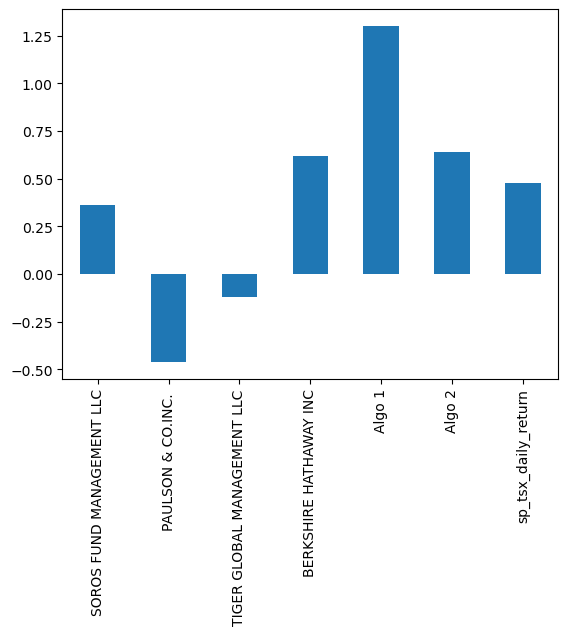

In [218]:
# Visualize the sharpe ratios as a bar plot
sharpe_combined.plot(kind='bar')



In [219]:
# Reading data from 1st stock

apple_path = Path("./Resources/AAPL.csv")

apple_data = pd.read_csv(apple_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)


apple_data

,Close
Date,
2012-10-01,23.55
2012-10-02,23.62
2012-10-03,23.98
2012-10-04,23.81
2012-10-05,23.31
...,...
2019-12-23,71.00
2019-12-24,71.07
2019-12-26,72.48


In [233]:
apple_data.isnull().sum()
apple_data = apple_data.sort_index()
apple_data

,Close
Date,
2012-10-01,23.55
2012-10-02,23.62
2012-10-03,23.98
2012-10-04,23.81
2012-10-05,23.31
...,...
2019-12-23,71.00
2019-12-24,71.07
2019-12-26,72.48


In [220]:
# Reading data from 2nd stock

google_path = Path("./Resources/GOOG.csv")

google_data = pd.read_csv(google_path, index_col = 'Date', parse_dates = True,infer_datetime_format = True)


google_data

,Close
Date,
2014-03-27,27.85
2014-03-28,27.92
2014-03-31,27.77
2014-04-01,28.28
2014-04-02,28.27
...,...
2019-12-23,67.44
2019-12-24,67.18
2019-12-26,68.02


In [235]:
apple_data.isnull().sum()
apple_data = apple_data.sort_index()
apple_data

,Close
Date,
2012-10-01,23.55
2012-10-02,23.62
2012-10-03,23.98
2012-10-04,23.81
2012-10-05,23.31
...,...
2019-12-23,71.00
2019-12-24,71.07
2019-12-26,72.48


In [226]:
# Reading data from 3rd stock


tesla_path = Path("./Resources/TSLA.csv")

tesla_data = pd.read_csv(tesla_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)


tesla_data

,Close
Date,
2012-10-01,1.94
2012-10-02,1.99
2012-10-03,1.95
2012-10-04,1.96
2012-10-05,1.93
...,...
2019-12-23,27.95
2019-12-24,28.35
2019-12-26,28.73


In [227]:
# Combine all stocks in a single DataFrame

combined_stocks = pd.concat([apple_data,google_data,tesla_data],axis = 'columns', join = 'inner')

combined_stocks

,Close,Close,Close
Date,,,
2014-03-27,19.20,27.85,13.82
2014-03-28,19.17,27.92,14.16
2014-03-31,19.17,27.77,13.90
2014-04-01,19.34,28.28,14.46
2014-04-02,19.38,28.27,15.35
...,...,...,...
2019-12-23,71.00,67.44,27.95
2019-12-24,71.07,67.18,28.35
2019-12-26,72.48,68.02,28.73


In [236]:
# Reorganize portfolio data by having a column per symbol

columns = ["AAPL", "GOOG", "TSLA"]
combined_stocks.columns = columns
combined_stocks


,AAPL,GOOG,TSLA
Date,,,
2014-03-27,19.20,27.85,13.82
2014-03-28,19.17,27.92,14.16
2014-03-31,19.17,27.77,13.90
2014-04-01,19.34,28.28,14.46
2014-04-02,19.38,28.27,15.35
...,...,...,...
2019-12-23,71.00,67.44,27.95
2019-12-24,71.07,67.18,28.35
2019-12-26,72.48,68.02,28.73


In [238]:
# Calculate daily returns
combined_stocks_daily_return = combined_stocks.pct_change()

combined_stocks_daily_return

# Drop NAs

combined_stocks_daily_return.dropna(inplace = True)

combined_stocks_daily_return

# Display sample data

,AAPL,GOOG,TSLA
Date,,,
2014-03-28,-0.001562,0.002513,0.024602
2014-03-31,0.000000,-0.005372,-0.018362
2014-04-01,0.008868,0.018365,0.040288
2014-04-02,0.002068,-0.000354,0.061549
2014-04-03,-0.007224,0.004952,-0.020847
...,...,...,...
2019-12-23,0.016318,-0.000593,0.033654
2019-12-24,0.000986,-0.003855,0.014311
2019-12-26,0.019840,0.012504,0.013404


In [248]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = combined_stocks_daily_return.dot(weights)


# Display sample data


portfolio_returns['2015-03-03':'2019-05-01']

Date
2015-03-03    0.005556
2015-03-04    0.002835
2015-03-05   -0.007398
2015-03-06   -0.015098
2015-03-09   -0.003093
                ...   
2019-04-25   -0.015176
2019-04-26   -0.015995
2019-04-29    0.013420
2019-04-30   -0.036001
2019-05-01    0.004128
Length: 1049, dtype: float64

In [256]:
# Join your returns DataFrame to the original returns DataFrame

complete_compare_set_daily_return = pd.concat([combined,portfolio_returns],axis = 'columns',join = 'inner')
complete_compare_set_daily_return


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_daily_return,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.005556
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.002835
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.007398
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.015098
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.003093
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.015176
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.015995
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.013420


In [257]:
columns = [
    'SOROS FUND MANAGEMENT LLC',
    'PAULSON & CO.INC.',
    'TIGER GLOBAL MANAGEMENT LLC',
    'BERKSHIRE HATHAWAY INC',
    'Algo 1',
    'Algo 2',
    'SP_TSX',
    'Customized',

]

complete_compare_set_daily_return.columns= columns
complete_compare_set_daily_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,Customized
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.005556
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.002835
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.007398
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.015098
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.003093
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.015176
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.015995
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.013420


In [258]:
# Calculate the annualized `std`

complete_compare_annual_std = complete_compare_set_daily_return.std() * np.sqrt(252)
complete_compare_annual_std


SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_TSX                         0.111664
Customized                     0.235791
dtype: float64

<AxesSubplot:xlabel='Date'>

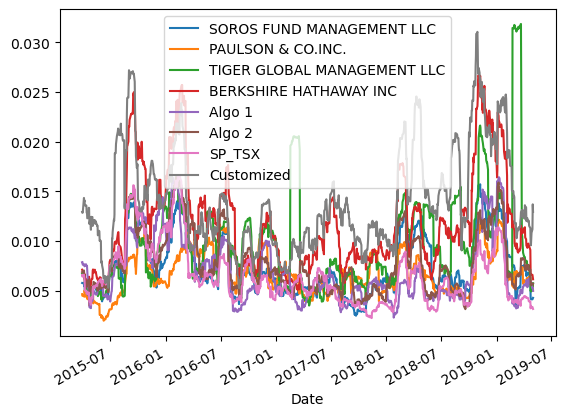

In [260]:
# Calculate rolling standard deviation

complete_daily_return_rolling_21 = complete_compare_set_daily_return.rolling(window = 21).std()

# Plot rolling standard deviation

complete_daily_return_rolling_21.plot()

In [263]:
# Calculate and plot the correlation


complete_correlation = complete_compare_set_daily_return.corr()
complete_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,Customized
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930,0.586995
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511,0.439187
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583,0.419479
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250,0.649018
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276,0.210730
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370,0.573190
SP_TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000,0.462171
Customized,0.586995,0.439187,0.419479,0.649018,0.210730,0.573190,0.462171,1.000000


<AxesSubplot:>

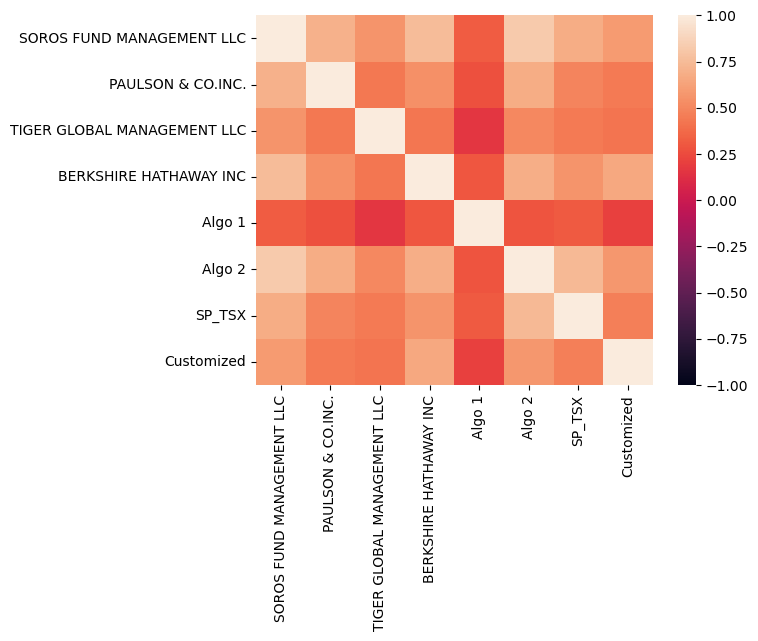

In [264]:
# Display the correlation matrix
sns.heatmap(complete_correlation,vmin=-1, vmax=1)

<AxesSubplot:xlabel='Date'>

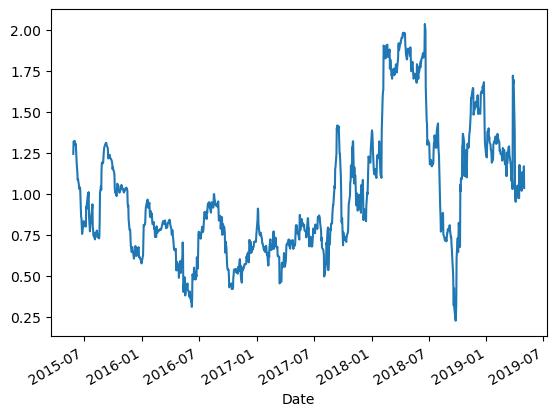

In [265]:
# Calculate and plot Beta


sp_rolling_60days_var

customized_rolling_60days_cov = complete_compare_set_daily_return['Customized'].rolling(window=60).cov(complete_compare_set_daily_return['SP_TSX'])

customized_beta_rolling_60days = customized_rolling_60days_cov/sp_rolling_60days_var

customized_beta_rolling_60days.plot()


In [267]:
# Calculate Annualized Sharpe Ratios

complete_annual_sharpe = complete_compare_set_daily_return.mean()*252/complete_compare_annual_std


<AxesSubplot:>

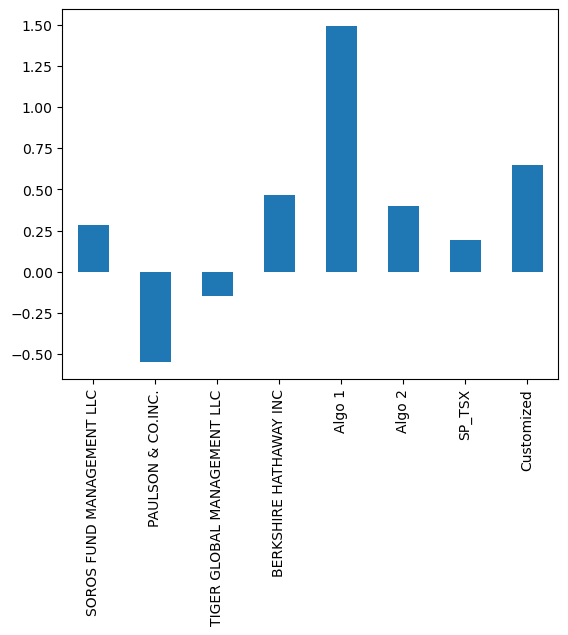

In [268]:
# Visualize the sharpe ratios as a bar plot

complete_annual_sharpe.plot(kind='bar')